In [7]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from numpy import linalg as LA

In [8]:
model = VGG16()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
vgg16 = VGG16(weights='imagenet', include_top=False)

#Add a layer where input is the output of the  second last layer 
#x = Dense(8, activation='softmax', name='predictions')(vgg16.layers[-2].output)

In [118]:
def extract_features(im):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = vgg16.predict(x)
    feat = np.asarray(features)
    feat_01 = np.resize(feat,(25088,1))
    #norm_feat = feat_01/LA.norm(feat_01)
    return feat_01

In [119]:
import os
m = os.listdir("../bhavana/Desktop/database")
all_features = []
for i in m:
    img_path = '../bhavana/Desktop/database/'+str(i)
    features = extract_features(img_path)
    all_features.append(features)
    
all_features = np.asarray(all_features)
print(len(all_features))
"""
scores = np.dot(queryVec, feats.T)
rank_ID = np.argsort(scores)[::-1]
rank_score = scores[rank_ID]
"""

9


'\nscores = np.dot(queryVec, feats.T)\nrank_ID = np.argsort(scores)[::-1]\nrank_score = scores[rank_ID]\n'

In [127]:
img_path = "../bhavana/Desktop/ant_image_01.jpeg"
features = extract_features(img_path)
print(len(features))


25088


In [128]:
scores = []
for i in all_features:
    scores.append(np.dot(i.T, features))

In [129]:
print(len(scores))
print(scores)
"""
for i in scores:
    print(scores)
"""

9
[array([[ 316414.375]], dtype=float32), array([[ 223025.5625]], dtype=float32), array([[ 165019.265625]], dtype=float32), array([[ 256124.671875]], dtype=float32), array([[ 260706.671875]], dtype=float32), array([[ 674320.1875]], dtype=float32), array([[ 642560.75]], dtype=float32), array([[ 197469.890625]], dtype=float32), array([[ 1046213.6875]], dtype=float32)]


'\nfor i in scores:\n    print(scores)\n'

In [130]:
rank_ID = np.argmax(scores)
print(rank_ID)

8


Input_Image


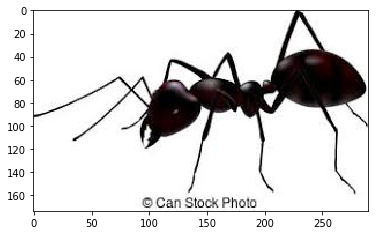

In [131]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img_path = "../bhavana/Desktop/ant_image_01.jpeg"
print("Input_Image")
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)

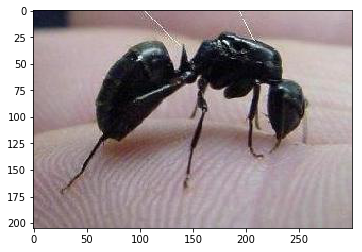

In [132]:
img_name = "../bhavana/Desktop/database/"+str(m[rank_ID])
#print("Output_Image")
img=mpimg.imread(img_name)
imgplot = plt.imshow(img)